In [2]:
import pandas as pd

# Pandas 실습2

1. 함수 적용(apply operations) <br>
: 사전에 정의되어 있거나, 사용자가 작성한 함수를 row/column/cell/group 기준으로 적용(apply)하는 함수


2. 데이터 변환(transformation) <br>
: 데이터프레임의 차원이나 구조를 변경하는 함수
    
    
3. 데이터 합치기(merge) <br>
: 두 개 이상의 Series 혹은 DataFrame을 합쳐서 새로운 데이터프레임을 생성

In [3]:
snp_comps = pd.read_csv('./data/sp500_companies.csv')
snp_price = pd.read_csv('./data/sp500_index.csv')
snp_stocks = pd.read_csv('./data/sp500_stocks.csv')

# 함수 적용 (apply operations)

## 가장 많이 사용하는 함수는 apply, groupby

## pd.Series

![apply_oper_series](./img/apply_oper_series.png)

In [4]:
snp_comps = snp_comps.set_index('Symbol')

In [5]:
exch_map_srs = pd.Series(['UW', 'UN', 'UQ', 'UF'], index=['NMS', 'NYQ', 'NGM', 'BTS'])
exch_map_dict = exch_map_srs.to_dict()

In [6]:
type(exch_map_srs)

pandas.core.series.Series

### Series.map 입력은 Series, dict, 혹은 function 가능

In [7]:
# Series.map(Series)
snp_comps.Exchange.map(exch_map_srs)

Symbol
AAPL     UW
MSFT     UW
GOOGL    UW
GOOG     UW
AMZN     UW
         ..
XRAY     UW
MHK      UN
ALK      UN
NWL      UW
VNO      UN
Name: Exchange, Length: 495, dtype: object

In [8]:
snp_comps.loc[:, 'ExchangeSymbol'] = snp_comps.Exchange.map(exch_map_srs)

In [9]:
# Series.map(dict)
snp_comps.Exchange.map(exch_map_dict)

Symbol
AAPL     UW
MSFT     UW
GOOGL    UW
GOOG     UW
AMZN     UW
         ..
XRAY     UW
MHK      UN
ALK      UN
NWL      UW
VNO      UN
Name: Exchange, Length: 495, dtype: object

In [10]:
def alter_exch_symbol(x):
    if x == 'NMS':
        out_ = 'UW'
    elif x == 'NYQ':
        out_ = 'UN'
    elif x == 'NGM':
        out_ = 'UQ'
    elif x == 'BTS':
        out_ = 'UF'
    return out_

In [11]:
# Series.map(func)
snp_comps.Exchange.map(alter_exch_symbol)

Symbol
AAPL     UW
MSFT     UW
GOOGL    UW
GOOG     UW
AMZN     UW
         ..
XRAY     UW
MHK      UN
ALK      UN
NWL      UW
VNO      UN
Name: Exchange, Length: 495, dtype: object

### Series.apply의 입력은 function만 가능

In [12]:
snp_comps.Exchange.apply(alter_exch_symbol)

Symbol
AAPL     UW
MSFT     UW
GOOGL    UW
GOOG     UW
AMZN     UW
         ..
XRAY     UW
MHK      UN
ALK      UN
NWL      UW
VNO      UN
Name: Exchange, Length: 495, dtype: object

### Mapping 입력값이 함수(function)일 경우, map과 apply는 동일한 결과
- 매핑하고자 하는 정보가 series이거나 dict일 경우, map 사용
- 매핑 데이터가 함수일 경우, apply 사용

### lambda 함수란? : a small anonymous function
- 이름을 지정하지 않은 간단한 함수  
- lambda $argument$ : $expression$

In [13]:
snp_comps.Weight.apply(lambda x: x * 100)

Symbol
AAPL     6.908983
MSFT     4.948586
GOOGL    3.373400
GOOG     3.371907
AMZN     2.814262
           ...   
XRAY     0.018448
MHK      0.018350
ALK      0.016545
NWL      0.016382
VNO      0.013110
Name: Weight, Length: 495, dtype: float64

### pd.agg (pd.aggregate) : 여러 개의 함수를 동시에 적용

In [14]:
snp_comps.Currentprice.agg(lambda x: x * 1300)
# snp_comps.Currentprice.apply(lambda x: x * 1300)

Symbol
AAPL     188539.0
MSFT     286130.0
GOOGL    113061.0
GOOG     113191.0
AMZN     119756.0
           ...   
XRAY      36634.0
MHK      117611.0
ALK       56628.0
NWL       16718.0
VNO       29692.0
Name: Currentprice, Length: 495, dtype: float64

In [2]:
snp_comps.Currentprice.agg([lambda x: x * 1300, lambda x: x * 1400])

NameError: name 'snp_comps' is not defined

In [16]:
import numpy as np

In [17]:
snp_comps.Currentprice.agg(np.mean)

157.1313838383837

In [18]:
snp_comps.Currentprice.agg([np.mean, np.std])

mean    157.131384
std     260.929441
Name: Currentprice, dtype: float64

### agg와 apply 동일한 결과를 반환하지만,
가장 큰 차이점은 <br>
지정된 함수의 입력값이 각 element를 받느냐, <br>
아니면 전체 series를 받는지에 대한 차이가 있음 <br>
agg도 기본적으로 각 element를 입력으로 받지만, Series에 적용되야 하는 함수(ex. sum or mean)가 있을 경우, series 전체를 입력으로 받음

In [19]:
snp_comps.Currentprice.agg(lambda x: x * 1300)

Symbol
AAPL     188539.0
MSFT     286130.0
GOOGL    113061.0
GOOG     113191.0
AMZN     119756.0
           ...   
XRAY      36634.0
MHK      117611.0
ALK       56628.0
NWL       16718.0
VNO       29692.0
Name: Currentprice, Length: 495, dtype: float64

In [20]:
snp_comps.Currentprice.apply(lambda x: x * 1300)

Symbol
AAPL     188539.0
MSFT     286130.0
GOOGL    113061.0
GOOG     113191.0
AMZN     119756.0
           ...   
XRAY      36634.0
MHK      117611.0
ALK       56628.0
NWL       16718.0
VNO       29692.0
Name: Currentprice, Length: 495, dtype: float64

In [21]:
snp_comps.Currentprice.agg(lambda x: x.sum())

77780.035

In [22]:
snp_comps.Currentprice.apply(lambda x: x.sum())

AttributeError: 'float' object has no attribute 'sum'

In [24]:
def print_and_sum(x):
    print(x)
    return x.sum()

In [25]:
snp_comps.Currentprice.agg(print_and_sum)

145.03
Symbol
AAPL     145.03
MSFT     220.10
GOOGL     86.97
GOOG      87.07
AMZN      92.12
          ...  
XRAY      28.18
MHK       90.47
ALK       43.56
NWL       12.86
VNO       22.84
Name: Currentprice, Length: 495, dtype: float64


77780.035

In [26]:
snp_comps.Currentprice.apply(print_and_sum)

145.03


AttributeError: 'float' object has no attribute 'sum'

###  pd.transform : 여러 개의 함수를 동시에 적용. 그러나 input series와 동일한 구조(index)의 output 출력만 가능

In [27]:
snp_comps.Currentprice.transform([lambda x: x * 1300, lambda x: x * 1400])

,<lambda>
Symbol,
AAPL,203042.0
MSFT,308140.0
GOOGL,121758.0
GOOG,121898.0
AMZN,128968.0
...,...
XRAY,39452.0
MHK,126658.0
ALK,60984.0


In [28]:
snp_comps.Currentprice.transform([lambda x: x.mean()])

ValueError: Function did not transform

### 여러 함수를 적용하는 경우, agg 함수만 사용해도 무방 

### series.groupby :  index를 기준으로 그룹핑하여 각 그룹별로 함수 적용

In [29]:
snp_comps = snp_comps.set_index('Sector', append=True)

In [30]:
snp_comps

,,Exchange,Shortname,Longname,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,ExchangeSymbol
Symbol,Sector,,,,,,,,,,,,,,,
AAPL,Technology,NMS,Apple Inc.,Apple Inc.,Consumer Electronics,145.03,2307151626240,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069090,UW
MSFT,Technology,NMS,Microsoft Corporation,Microsoft Corporation,Software—Infrastructure,220.10,1652506361856,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.049486,UW
GOOGL,Communication Services,NMS,Alphabet Inc.,Alphabet Inc.,Internet Content & Information,86.97,1126496337920,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.033734,UW
GOOG,Communication Services,NMS,Alphabet Inc.,Alphabet Inc.,Internet Content & Information,87.07,1125998002176,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.033719,UW
AMZN,Consumer Cyclical,NMS,"Amazon.com, Inc.","Amazon.com, Inc.",Internet Retail,92.12,939780669440,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.028143,UW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRAY,Healthcare,NMS,DENTSPLY SIRONA Inc.,DENTSPLY SIRONA Inc.,Medical Instruments & Supplies,28.18,6160345600,9.170000e+08,-0.060,Charlotte,NC,United States,15000.0,DENTSPLY SIRONA Inc. manufactures and sells va...,0.000184,UW
MHK,Consumer Cyclical,NYQ,"Mohawk Industries, Inc.","Mohawk Industries, Inc.","Furnishings, Fixtures & Appliances",90.47,6127750144,1.888004e+09,0.067,Calhoun,GA,United States,43000.0,"Mohawk Industries, Inc. designs, manufactures,...",0.000184,UN
ALK,Industrials,NYQ,"Alaska Air Group, Inc.","Alaska Air Group, Inc.",Airlines,43.56,5524889088,1.073000e+09,0.448,Seattle,WA,United States,22354.0,"Alaska Air Group, Inc., through its subsidiari...",0.000165,UN


In [31]:
snp_comps.Weight.groupby(level=1).mean()

Sector
Basic Materials           0.001078
Communication Services    0.004723
Consumer Cyclical         0.001608
Consumer Defensive        0.002273
Energy                    0.002346
Financial Services        0.001919
Healthcare                0.002307
Industrials               0.001222
Real Estate               0.000791
Technology                0.003191
Utilities                 0.000967
Name: Weight, dtype: float64

### series.rolling / series.expanding : window에 따라 함수 적용

In [32]:
snp_price = snp_price.set_index('Date')

In [33]:
snp_price['S&P500'].rolling(window=12, min_periods=4).mean()
# snp_price['S&P500'].rolling(window=12, min_periods=4).apply(lambda x: x.mean())

Date
2012-11-05            NaN
2012-11-06            NaN
2012-11-07            NaN
2012-11-08    1404.422500
2012-11-09    1399.508000
                 ...     
2022-10-27    3719.665000
2022-10-28    3746.667500
2022-10-31    3763.506667
2022-11-01    3786.259167
2022-11-02    3793.070833
Name: S&P500, Length: 2517, dtype: float64

In [34]:
snp_price['S&P500'].expanding(min_periods=4).sum()

Date
2012-11-05           NaN
2012-11-06           NaN
2012-11-07           NaN
2012-11-08       5617.69
2012-11-09       6997.54
                 ...    
2022-10-27    6788801.81
2022-10-28    6792702.87
2022-10-31    6796574.85
2022-11-01    6800430.95
2022-11-02    6804190.64
Name: S&P500, Length: 2517, dtype: float64

In [35]:
snp_price['S&P500'].expanding(min_periods=4).sum()
# snp_price['S&P500'].cumsum()

Date
2012-11-05           NaN
2012-11-06           NaN
2012-11-07           NaN
2012-11-08       5617.69
2012-11-09       6997.54
                 ...    
2022-10-27    6788801.81
2022-10-28    6792702.87
2022-10-31    6796574.85
2022-11-01    6800430.95
2022-11-02    6804190.64
Name: S&P500, Length: 2517, dtype: float64

## pd.DataFrame
- 사용하는 방법은 Series와 대부분 유사
- pd.Series에는 map이 있고, pd.DataFrame에는 map이 없음
- pd.Series에는 applymap이 없고, pd.DataFrame에는 applymap이 있음

![apply_oper_dataframe](./img/apply_oper_dataframe.png)

### DataFrame.apply / DataFrame.applymap

- df.apply(함수, axis=0) : 각 열에 지정한 함수를 실행 (axis=0, default)
- df.apply(함수, axis=1) : 각 행에 지정한 함수를 실행 (axis=1)
- df.applymap(함수) : 모든 element에 지정한 함수를 실행

In [36]:
snp_comps = snp_comps.reset_index(1)

In [38]:
snp_comps.loc[:, 'BloombergExchTicker'] = snp_comps.apply(lambda x: x.name + ' ' + x.ExchangeSymbol + ' Equity', axis=1)

In [39]:
snp_comps

,Sector,Exchange,Shortname,Longname,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,ExchangeSymbol,BloombergExchTicker
Symbol,,,,,,,,,,,,,,,,,
AAPL,Technology,NMS,Apple Inc.,Apple Inc.,Consumer Electronics,145.03,2307151626240,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069090,UW,AAPL UW Equity
MSFT,Technology,NMS,Microsoft Corporation,Microsoft Corporation,Software—Infrastructure,220.10,1652506361856,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.049486,UW,MSFT UW Equity
GOOGL,Communication Services,NMS,Alphabet Inc.,Alphabet Inc.,Internet Content & Information,86.97,1126496337920,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.033734,UW,GOOGL UW Equity
GOOG,Communication Services,NMS,Alphabet Inc.,Alphabet Inc.,Internet Content & Information,87.07,1125998002176,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.033719,UW,GOOG UW Equity
AMZN,Consumer Cyclical,NMS,"Amazon.com, Inc.","Amazon.com, Inc.",Internet Retail,92.12,939780669440,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.028143,UW,AMZN UW Equity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRAY,Healthcare,NMS,DENTSPLY SIRONA Inc.,DENTSPLY SIRONA Inc.,Medical Instruments & Supplies,28.18,6160345600,9.170000e+08,-0.060,Charlotte,NC,United States,15000.0,DENTSPLY SIRONA Inc. manufactures and sells va...,0.000184,UW,XRAY UW Equity
MHK,Consumer Cyclical,NYQ,"Mohawk Industries, Inc.","Mohawk Industries, Inc.","Furnishings, Fixtures & Appliances",90.47,6127750144,1.888004e+09,0.067,Calhoun,GA,United States,43000.0,"Mohawk Industries, Inc. designs, manufactures,...",0.000184,UN,MHK UN Equity
ALK,Industrials,NYQ,"Alaska Air Group, Inc.","Alaska Air Group, Inc.",Airlines,43.56,5524889088,1.073000e+09,0.448,Seattle,WA,United States,22354.0,"Alaska Air Group, Inc., through its subsidiari...",0.000165,UN,ALK UN Equity


### DataFrame.agg / DataFrame.transform

In [295]:
# 여러 함수를 동시에 각 행/열에 적용
snp_comps[['Ebitda', 'Revenuegrowth', 'Marketcap']].agg([len, np.mean, np.std])

,Ebitda,Revenuegrowth,Marketcap
len,4.950000e+02,495.000000,4.950000e+02
mean,6.056162e+09,0.612858,6.746162e+10
std,1.210925e+10,7.771660,1.642378e+11


In [298]:
# 여러 함수를 동시에 각 행/열에 적용, but 결과는 반드시 기존 Dataframe의 index와 같은 구조여야 함
# transform은 특히 아래 groupby 함수와 같이 쓰면 효율적
snp_comps[['Ebitda', 'Revenuegrowth', 'Marketcap']].transform([lambda x: x * 100, lambda x: x - 200])

Ebitda               Revenuegrowth                 Marketcap  \
            <lambda>      <lambda>      <lambda> <lambda>         <lambda>   
Symbol                                                                       
AAPL    1.305410e+13  1.305410e+11           8.1 -199.919  230715162624000   
MSFT    9.798300e+12  9.798300e+10          12.4 -199.876  165250636185600   
GOOGL   9.373300e+12  9.373300e+10           6.1 -199.939  112649633792000   
GOOG    9.373300e+12  9.373300e+10           6.1 -199.939  112599800217600   
AMZN    5.154900e+12  5.154900e+10          14.7 -199.853   93978066944000   
...              ...           ...           ...      ...              ...   
XRAY    9.170000e+10  9.169998e+08          -6.0 -200.060     616034560000   
MHK     1.888004e+11  1.888004e+09           6.7 -199.933     612775014400   
ALK     1.073000e+11  1.073000e+09          44.8 -199.552     552488908800   
NWL     1.390000e+11  1.390000e+09          -6.5 -200.065     547064371200   
VNO     8.103430e+10  8.103428e+08          16.3 -199.837     437799372800   

                       
             <lambda>  
Symbol                 
AAPL    2307151626040  
MSFT    1652506361656  
GOOGL   1126496337720  
GOOG    1125998001976  
AMZN     939780669240  
...               ...  
XRAY       6160345400  
MHK        6127749944  
ALK        5524888888  
NWL        5470643512  
VNO        4377993528  

[495 rows x 6 columns]

### DataFrame.groupby
- 특정 인덱스 혹은 컬럼 기준으로 그룹핑하여 함수 적용

In [332]:
snp_comps.groupby('Sector').Weight.sum()

Sector
Basic Materials           0.022636
Communication Services    0.103914
Consumer Cyclical         0.091646
Consumer Defensive        0.081824
Energy                    0.053957
Financial Services        0.130473
Healthcare                0.147635
Industrials               0.087983
Real Estate               0.025306
Technology                0.226588
Utilities                 0.028036
Name: Weight, dtype: float64

In [339]:
# 각 함수에는 입력값으로 Sector에 따라 구분된 DataFrame이 들어감
# snp_comps.groupby('Sector').apply(함수)

In [340]:
def check_input(x):
    print("=" * 50)
    print(isinstance(x, pd.DataFrame))
    print(x.Sector.unique())
    print(x.columns)
    print(x.index)

In [341]:
snp_comps.groupby('Sector').apply(check_input)

True
['Basic Materials']
Index(['Sector', 'Exchange', 'Shortname', 'Longname', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'ExchangeSymbol', 'BloombergExchTicker'],
      dtype='object')
Index(['LIN', 'SHW', 'APD', 'CTVA', 'FCX', 'ECL', 'NUE', 'DOW', 'NEM', 'DD',
       'ALB', 'PPG', 'LYB', 'IFF', 'CF', 'VMC', 'MLM', 'MOS', 'FMC', 'EMN',
       'CE'],
      dtype='object', name='Symbol')
True
['Communication Services']
Index(['Sector', 'Exchange', 'Shortname', 'Longname', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'ExchangeSymbol', 'BloombergExchTicker'],
      dtype='object')
Index(['GOOGL', 'GOOG', 'TMUS', 'DIS', 'VZ', 'CMCSA', 'T', 'NFLX', 'CHTR',
       'ATVI', 'EA', 'LYV', 'FOX', 'FOXA', 'OMC', 'TTWO', 'MTCH', 'IPG', 'NWS',
      

""


In [342]:
def cal_weight(x):
    copy_x = x.copy()
    return copy_x.Weight.sum()

In [343]:
snp_comps.groupby('Sector').apply(cal_weight)

Sector
Basic Materials           0.022636
Communication Services    0.103914
Consumer Cyclical         0.091646
Consumer Defensive        0.081824
Energy                    0.053957
Financial Services        0.130473
Healthcare                0.147635
Industrials               0.087983
Real Estate               0.025306
Technology                0.226588
Utilities                 0.028036
dtype: float64

- groupby는 groupby 컬럼 기준으로 reindex한 결과를 반환
- groupby.transform 하면 기존 DataFrame의 index 기준으로 반환함

In [349]:
snp_comps.groupby('Sector')[['Ebitda', 'Revenuegrowth']].apply(lambda x: x.mean())

,Ebitda,Revenuegrowth
Sector,,
Basic Materials,4.828141e+09,0.291048
Communication Services,1.882970e+10,0.277227
Consumer Cyclical,4.471681e+09,3.957930
Consumer Defensive,6.051607e+09,0.093333
Energy,1.160552e+10,0.803783
Financial Services,4.626184e+09,0.013735
Healthcare,6.702209e+09,0.104516
Industrials,3.394158e+09,0.159500
Real Estate,1.862984e+09,0.227531


In [359]:
# 각 종목에 대한 섹터 평균값을 기존 데이터프레임과 같은 구조로 계산할 수 있음
# transform 함수를 사용하지 않으면 별도로 merge 하는 계산을 해야 함
snp_comps.loc[:, 'SctrAVgEbitda'] = snp_comps.groupby('Sector')['Ebitda'].transform(lambda x: x.mean())

- groupby (multi column grouping)

In [358]:
snp_comps.groupby(['Sector', 'Industry']).Weight.sum()

Sector           Industry                             
Basic Materials  Agricultural Inputs                      0.003154
                 Building Materials                       0.001251
                 Chemicals                                0.001344
                 Copper                                   0.001364
                 Gold                                     0.000944
                                                            ...   
Utilities        Utilities—Diversified                    0.001956
                 Utilities—Independent Power Producers    0.000318
                 Utilities—Regulated Electric             0.024266
                 Utilities—Regulated Gas                  0.000743
                 Utilities—Regulated Water                0.000752
Name: Weight, Length: 113, dtype: float64

### DataFrame.rolling / DataFrame.expanding

In [375]:
pvt_snp_stocks = snp_stocks.pivot(index='Date', columns='Symbol', values='Adj Close')

In [376]:
moving_avg_df = pvt_snp_stocks.rolling(window=12, min_periods=3).mean()

In [377]:
moving_avg_df.columns = [idx + '_MA' for idx in moving_avg_df.columns]

In [381]:
prc_snp_stocks = pd.concat([pvt_snp_stocks, moving_avg_df], axis=1)

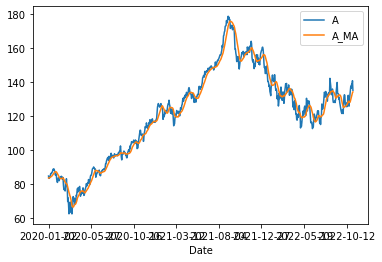

In [387]:
prc_snp_stocks.loc['2020-01-01':, ['A', 'A_MA']].plot()

## Exercies 2.1
- 1) snp_comps의 Country 컬럼을 {'United States' : 'US'}로 매핑하여 'CountryISO' 컬럼으로 저장
- 2) snp_comps에서 Marketcap 컬럼을 log(MarketCap)으로 계산하여 'LogMarketcap' 컬럼으로 저장
- 4) snp_comps에서 'LogMarketcap' (Desc), 'Ebitda' (Asc), 'Revenuegrowth' (Asc) 세 변수를 표준화하여 z-score로 계산
    - LogMarketcap는 낮을수록 높은 z-score를 가지도록 변환
- 5) snp_comps에서 3개 팩터를 동일 비중으로 합쳐서 최종 Composite z-score 생성하여 'CompFctr'로 저장
- 6) 최종 팩터 'CompFctr' 기준으로 quintile (5분위)로 그룹 나눈 후,
    - 각 그룹의 벤치마크 비중, 섹터 비중, 평균 Marketcap/Ebitda/Revenuegrowth 계산

In [389]:
snp_comps = pd.read_csv('./data/sp500_companies.csv')
snp_price = pd.read_csv('./data/sp500_index.csv')
snp_stocks = pd.read_csv('./data/sp500_stocks.csv')